# KNN Regressor

###  It is the calculation of the average of the K- nearest neighbours from the training data.


Below are the asked that are being carried out in this - 

i.   Implementing KNN regressor function that can accept multiple inputs

ii.  Error plots for train and test data w.r.t 1/K

iii. Report


In [25]:
# importing required libraries
library(reshape2)
library(ggplot2)

#### Loading training and testing data provided. 

In [26]:
train = read.csv(file='Task1A_train.csv')
test = read.csv(file='Task1A_test.csv')

dim(train)
# first five rows of train and test data
head(train)
head(test)

[1] 42  2

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [27]:
# seperating the dependent(value to be predicted 'Y') and independent variables ('X') 

train.data = train[1] # 1st column of train data is X
train.label = train[,2] # second or the last column is Y

test.data = test[1]
test.label=test[,2]

# preview of how the variables are
head(train.data)
head(test.data)
head(train.label)

x1
1960.0
1960.5
1961.0
1961.5
1962.0
1962.5


x1
1960.25
1960.75
1961.25
1961.75
1962.25
1962.75


[1] 0.71 0.85 0.61 0.92 0.72 0.92

#### i. Implementing KNN regressor

In [28]:
# average function to calculate the average of the nearest neighbours.
average = function(train.label){
    ## get the average of all the samples
    return(mean(train.label))
}

inputs of KNN function are (x variable of train data , y variable of train data , x variable of test data , K value)

output is the predicted y variables of test data.

In [34]:
knn <- function(train.data, train.label, test.data, K=3){ # by default using k = 3
    
    ## number of train samples
    train.len = nrow(train.data)
    
    ## number of test samples
    test.len = nrow(test.data)
    
    ## distances between samples using method 'euclidean'
    dist = as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample
    for (i in 1:test.len){
        
        ### fetching K nearest neighbours of test sample from training sampels
        nn = as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### Average of these nearest neighbours is obatined using the average function
        test.label[i] = (average(train.label[nn]))
    }
    
    ## return predicted labels as output
    return (test.label)
    
}

Above KNN function is called to predict the test data

In [30]:
knn(train.data, train.label, test.data)

[1]  0.7233333  0.7233333  0.7933333  0.7500000  0.8533333  0.8233333
 [7]  0.9166667  0.9166667  1.0533333  1.1066667  1.2833333  1.2900000
[13]  1.5233333  1.5500000  1.7400000  1.6300000  1.9000000  2.0100000
[19]  2.4000000  2.5500000  3.0600000  3.3600000  3.8700000  4.2600000
[25]  4.7400000  5.1600000  5.7300000  6.0600000  6.5100000  6.6300000
[31]  7.2300000  7.5000000  7.9500000  8.5200000  9.1200000 10.3200000
[37] 11.1900000 12.6900000 13.6800000 15.0300000 15.6900000 15.6900000

#### ii. Error plots of training and testing data w.r.t 1/K value

In [38]:
# provided maximum value of k is 20
max.k = 20

# dataframe to save the errors.
# Mean square error is used to calculate the errors
MSE = data.frame('k' = 1:max.k,'train'=rep(0,max.k),'test'=rep(0,max.k))

# form 1 to max.k (42) errors are calculated upon estimating the values using KNN function
for (k in 1:max.k){
    MSE[k,2] = sum((knn(train.data, train.label, train.data,k) - train.label)^2)/nrow(train.data) # training error
    MSE[k,3] = sum((knn(train.data, train.label, test.data,k) - test.label)^2)/nrow(test.data) # testing error
}
head(MSE)

k,train,test
1,0.00000000,1.689724
2,0.12229226,2.126671
3,0.09634101,1.695130
4,0.14983810,1.852862
5,0.15821952,1.380205
6,0.28321620,1.472957


In [39]:
# melt fucntion from reshape library is used to compress the dataframe.

MSE.melt = melt(MSE,id='k') # k is used as id and other are compressed to variable and values
names(MSE.melt) = c('k','type','error') # changing the column names
head(MSE.melt)

k,type,error
1,train,0.00000000
2,train,0.12229226
3,train,0.09634101
4,train,0.14983810
5,train,0.15821952
6,train,0.28321620


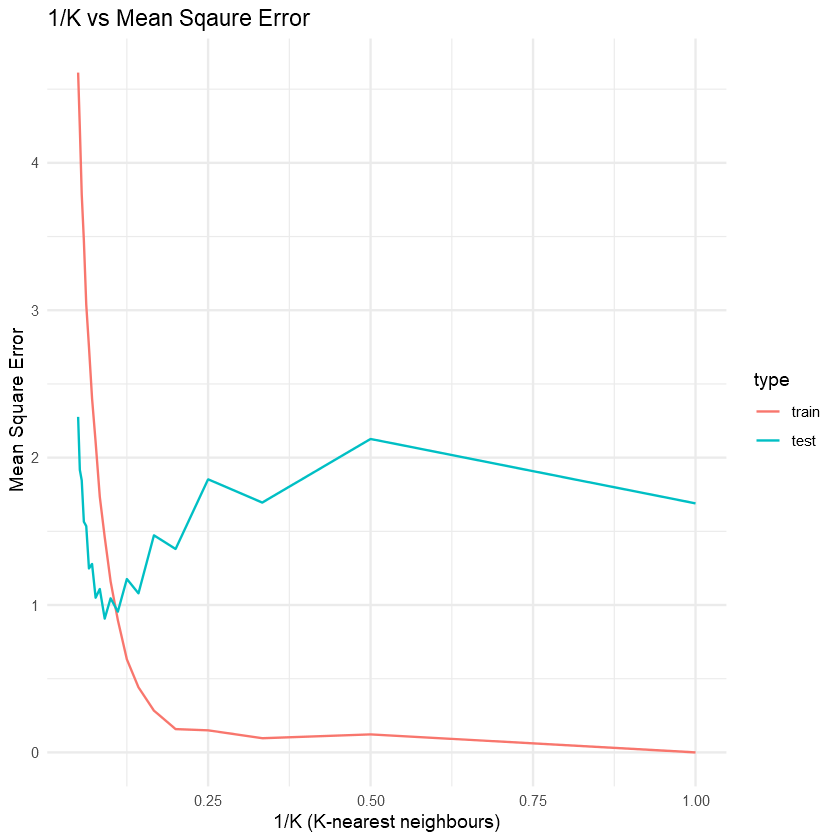

In [44]:
# plot 1/k vs. mean square error 
#ggplot(aes(k,error,color = type),data = MSE.melt) + geom_line()+ theme_minimal() + ggtitle("Mean Sqaure Error")
ggplot(aes((1/k),error,color = type),data = MSE.melt) + geom_line()+ theme_minimal() +
       ggtitle("1/K vs Mean Sqaure Error") + xlab("1/K (K-nearest neighbours)") + ylab("Mean Square Error")

### iii. Report

at k = 1 ==> 1/k = 1, training MSE is zero where as testing error is high.

as the k kept increaing the, training MSE kept increaing gradually and the the testing error kept decreasing. 

At some value of K, testing MSE stoped decreaing and started increasing. In this case the K value is at k=11.

At this k-value trainign error is also high. so optimal value of K to get better results can be between 9, 10 or 11.

Among these best can be considered as 9. as it has considerabliy low testing error along with low training error.